In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        x = np.insert(x, 0, 1)
        return 1 if np.dot(self.weights, x) >= 0 else 0

    def train(self, X, y):
        errors = []
        for _ in range(self.epochs):
            total_error = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                total_error += abs(error)
                self.weights += self.learning_rate * error * np.insert(xi, 0, 1)
            errors.append(total_error)
            if total_error == 0:
                break
        return errors


In [3]:

def plot_decision_boundary(X, y, weights, title):
    plt.figure()
    for xi, target in zip(X, y):
        color = 'r' if target == 0 else 'b'
        plt.scatter(xi[0], xi[1], c=color)
    x1 = np.linspace(0, 1, 100)
    x2 = -(weights[0] + weights[1] * x1) / weights[2]
    plt.plot(x1, x2, 'k-')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()



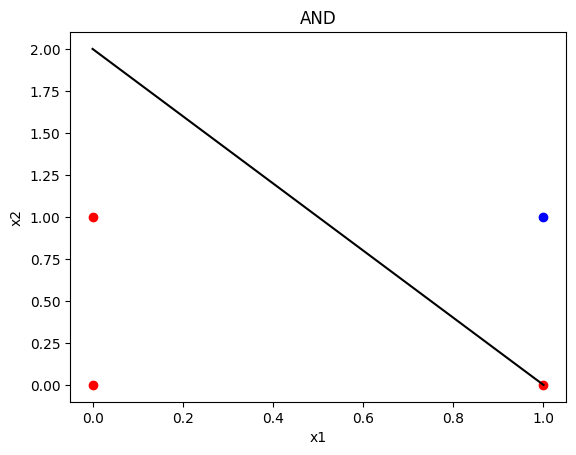

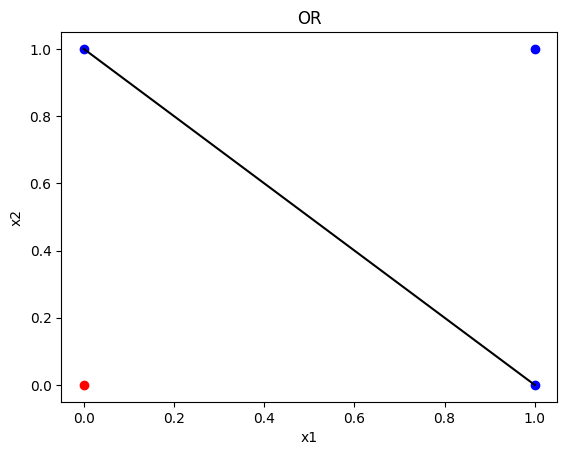

C:\Users\kntpr\AppData\Local\Temp\ipykernel_2916\1211194314.py:7: RuntimeWarning: divide by zero encountered in divide
  x2 = -(weights[0] + weights[1] * x1) / weights[2]
C:\Users\kntpr\AppData\Local\Temp\ipykernel_2916\1211194314.py:7: RuntimeWarning: invalid value encountered in divide
  x2 = -(weights[0] + weights[1] * x1) / weights[2]


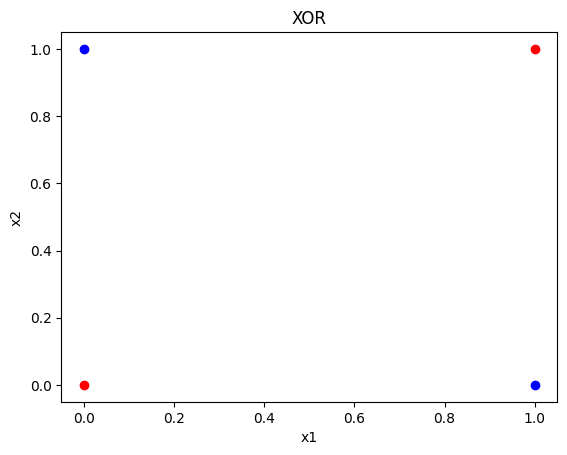

Pesos Perceptron para AND: [-0.2  0.2  0.1]
Pesos Perceptron para OR: [-0.1  0.1  0.1]
Pesos Perceptron para XOR: [ 0.  -0.1  0. ]


In [4]:

# AND com 2 inputs
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
perceptron_and = Perceptron(input_size=2)
errors_and = perceptron_and.train(X_and, y_and)
plot_decision_boundary(X_and, y_and, perceptron_and.weights, 'AND')

# OR com 2 inputs
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
perceptron_or = Perceptron(input_size=2)
errors_or = perceptron_or.train(X_or, y_or)
plot_decision_boundary(X_or, y_or, perceptron_or.weights, 'OR')

# XOR com 2 inputs
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
perceptron_xor = Perceptron(input_size=2)
errors_xor = perceptron_xor.train(X_xor, y_xor)
plot_decision_boundary(X_xor, y_xor, perceptron_xor.weights, 'XOR')

print("Pesos Perceptron para AND:", perceptron_and.weights)
print("Pesos Perceptron para OR:", perceptron_or.weights)
print("Pesos Perceptron para XOR:", perceptron_xor.weights)



In [ ]:
import numpy as np

class BackPropagation:
    def __init__(self, layers, learning_rate=0.1, epochs=1000, activation='sigmoid', use_bias=True):
        self.layers = layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation = activation
        self.use_bias = use_bias
        self.weights = []
        self.biases = []
        self.init_weights()

    def init_weights(self):
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i + 1])
            self.weights.append(weight)
            if self.use_bias:
                bias = np.random.randn(self.layers[i + 1])
                self.biases.append(bias)

    def activation_function(self, x):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'tanh':
            return np.tanh(x)
        elif self.activation == 'relu':
            return np.maximum(0, x)

    def activation_derivative(self, x):
        if self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'tanh':
            return 1 - x ** 2
        elif self.activation == 'relu':
            return np.where(x > 0, 1, 0)

    def forward(self, x):
        activations = [x]
        for i in range(len(self.weights)):
            x = np.dot(x, self.weights[i])
            if self.use_bias:
                x += self.biases[i]
            x = self.activation_function(x)
            activations.append(x)
        return activations

    def backward(self, activations, y):
        deltas = [y - activations[-1]]
        for i in range(len(self.weights) - 1, 0, -1):
            delta = deltas[-1].dot(self.weights[i].T) * self.activation_derivative(activations[i])
            deltas.append(delta)
        deltas.reverse()
        for i in range(len(self.weights)):
            self.weights[i] += activations[i].T.dot(deltas[i]) * self.learning_rate
            if self.use_bias:
                self.biases[i] += np.sum(deltas[i], axis=0) * self.learning_rate

    def train(self, X, y):
        for _ in range(self.epochs):
            activations = self.forward(X)
            self.backward(activations, y)

    def predict(self, X):
        return self.forward(X)[-1]



In [ ]:
# Função para criar dados de entrada e saída para AND, OR e XOR com n entradas
def create_data(logic_function, n):
    X = np.array([list(map(int, bin(i)[2:].zfill(n))) for i in range(2**n)])
    if logic_function == 'AND':
        y = np.array([[np.prod(x)] for x in X])
    elif logic_function == 'OR':
        y = np.array([[np.max(x)] for x in X])
    elif logic_function == 'XOR':
        y = np.array([[np.sum(x) % 2] for x in X])
    return X, y

In [ ]:
n = 2  
logic_function = 'XOR'  
X, y = create_data(logic_function, n)

nn = BackPropagation(layers=[n, 2, 1], learning_rate=0.1, epochs=10000, activation='sigmoid', use_bias=True)
nn.train(X, y)
predictions = nn.predict(X)
print(f"Predictions for {logic_function} with {n} inputs:\n", predictions)